In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [9]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


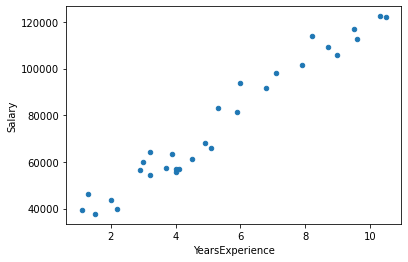

In [10]:
data.plot(kind='scatter', x='YearsExperience', y='Salary')
#plt.scatter(data['YearsExperience'], data['Salary'], color='b')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [11]:
#data.describe()
#data.info()

# Drop null values
data = data.dropna()
data.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [12]:
X = data['YearsExperience']
Y = data['Salary']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [13]:
# Split data into train and test sets using scikit learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

In [14]:
# Create new axis for x 
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]
print(len(X_test))

9


C:\Users\prito\AppData\Local\Temp\ipykernel_10876\2654282598.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
C:\Users\prito\AppData\Local\Temp\ipykernel_10876\2654282598.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [15]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
#model.fit(data[['YearsExperience']], data.Salary)

LinearRegression()

In [16]:
print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [9731.20383825]
Intercept:  25202.887786154883


In [17]:
# Predicting salaries for the test data
y_pred = model.predict(X_test)
model.predict([[12]])

array([141977.3338451])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))

Mean Absolute Error:  5010.529885004953
Mean Squared Error:  30310299.043402452
R2 Score:  0.9627668685473267


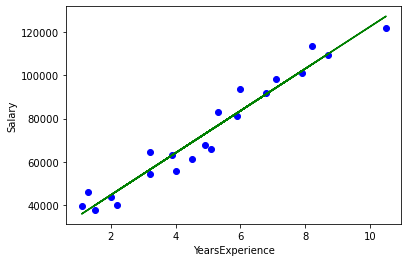

In [25]:
plt.scatter(X_train, y_train, color='b')
#plt.plot(X_test, y_pred, color='r')
plt.plot(X_train, model.predict(X_train), color='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [20]:
# Predicting salaries for the over all data set
train_pred = model.predict(data[['YearsExperience']])

c:\Users\prito\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
# add predicted values to the original data with a new column 
data['Prediction'] = train_pred
data

,YearsExperience,Salary,Prediction
0,1.1,39343,35907.212008
1,1.3,46205,37853.452776
2,1.5,37731,39799.693544
3,2.0,43525,44665.295463
4,2.2,39891,46611.536230
5,2.9,56642,53423.378917
6,3.0,60150,54396.499301
7,3.2,54445,56342.740069
8,3.2,64445,56342.740069
9,3.7,57189,61208.341988


In [24]:
#write updated data in the original CSV file
data.to_csv('Salary_Data.csv', index=False)